# Use only Brute Force

In [1]:
# 최근접 점의 쌍을 찾는 함수 (Brute Force 방식)
def closest_pair_of_points(points):
    min_distance = float('inf')
    closest_pair = (None, None)
    
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            distance = calculate_distance(points[i], points[j])
            if distance < min_distance:
                min_distance = distance
                closest_pair = (points[i], points[j])
    
    return closest_pair, min_distance

# Use Divide and Conquer algorithm
## and some brute forces

In [2]:
# 최근접 점의 쌍을 찾는 분할 정복 기법
def closest_pair_of_points(points):
    points_sorted_by_x = sorted(points, key=lambda p: p[0])
    points_sorted_by_y = sorted(points, key=lambda p: p[1])
    return closest_pair_recursive(points_sorted_by_x, points_sorted_by_y)

def closest_pair_recursive(points_sorted_by_x, points_sorted_by_y):
    if len(points_sorted_by_x) <= 3:
        return brute_force_closest_pair(points_sorted_by_x)

    mid = len(points_sorted_by_x) // 2
    left_of_center = points_sorted_by_x[:mid]
    right_of_center = points_sorted_by_x[mid:]

    midpoint_x = points_sorted_by_x[mid][0]

    left_of_center_y = [p for p in points_sorted_by_y if p[0] <= midpoint_x]
    right_of_center_y = [p for p in points_sorted_by_y if p[0] > midpoint_x]

    closest_pair_left, min_distance_left = closest_pair_recursive(left_of_center, left_of_center_y)
    closest_pair_right, min_distance_right = closest_pair_recursive(right_of_center, right_of_center_y)

    min_distance = min(min_distance_left, min_distance_right)
    if min_distance_left < min_distance_right:
        closest_pair = closest_pair_left
    else:
        closest_pair = closest_pair_right

    closest_split_pair, split_distance = closest_split_pair_check(points_sorted_by_x, points_sorted_by_y, min_distance, midpoint_x)

    if split_distance < min_distance:
        return closest_split_pair, split_distance
    else:
        return closest_pair, min_distance

# 경계선을 기준으로 두 점을 비교
def closest_split_pair_check(points_sorted_by_x, points_sorted_by_y, delta, midpoint_x):
    strip_points = [p for p in points_sorted_by_y if abs(p[0] - midpoint_x) < delta]

    min_distance = delta
    closest_pair = (None, None)

    for i in range(len(strip_points)):
        for j in range(i + 1, min(i + 7, len(strip_points))):
            distance = calculate_distance(strip_points[i], strip_points[j])
            if distance < min_distance:
                min_distance = distance
                closest_pair = (strip_points[i], strip_points[j])

    return closest_pair, min_distance

# 브루트 포스 방식으로 최근접 점의 쌍을 찾는 함수
def brute_force_closest_pair(points):
    min_distance = float('inf')
    closest_pair = (None, None)

    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            distance = calculate_distance(points[i], points[j])
            if distance < min_distance:
                min_distance = distance
                closest_pair = (points[i], points[j])

    return closest_pair, min_distance

# Use Both Algorithm
## Brute & DaC

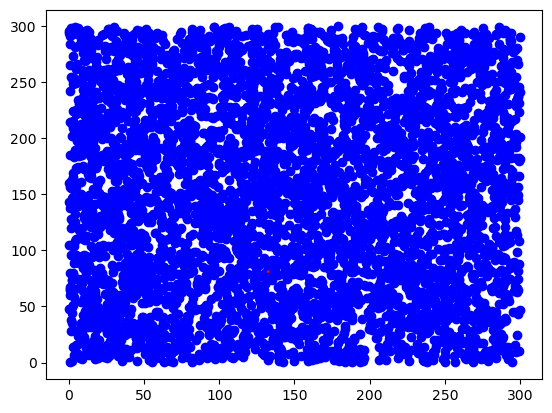

In [3]:
import tkinter as tk
import random
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import time  # 시간 측정을 위한 모듈

# 두 점 사이의 거리를 계산하는 함수
def calculate_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# 최근접 점의 쌍을 찾는 브루트 포스 방식
def brute_force_closest_pair(points):
    min_distance = float('inf')
    closest_pair = (None, None)

    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            distance = calculate_distance(points[i], points[j])
            if distance < min_distance:
                min_distance = distance
                closest_pair = (points[i], points[j])

    return closest_pair, min_distance

# 분할 정복 방식으로 최근접 점의 쌍을 찾는 함수
def closest_pair_of_points(points):
    points_sorted_by_x = sorted(points, key=lambda p: p[0])
    points_sorted_by_y = sorted(points, key=lambda p: p[1])
    return closest_pair_recursive(points_sorted_by_x, points_sorted_by_y)

def closest_pair_recursive(points_sorted_by_x, points_sorted_by_y):
    if len(points_sorted_by_x) <= 3:
        return brute_force_closest_pair(points_sorted_by_x)

    mid = len(points_sorted_by_x) // 2
    left_of_center = points_sorted_by_x[:mid]
    right_of_center = points_sorted_by_x[mid:]

    midpoint_x = points_sorted_by_x[mid][0]

    left_of_center_y = [p for p in points_sorted_by_y if p[0] <= midpoint_x]
    right_of_center_y = [p for p in points_sorted_by_y if p[0] > midpoint_x]

    closest_pair_left, min_distance_left = closest_pair_recursive(left_of_center, left_of_center_y)
    closest_pair_right, min_distance_right = closest_pair_recursive(right_of_center, right_of_center_y)

    min_distance = min(min_distance_left, min_distance_right)
    if min_distance_left < min_distance_right:
        closest_pair = closest_pair_left
    else:
        closest_pair = closest_pair_right

    closest_split_pair, split_distance = closest_split_pair_check(points_sorted_by_x, points_sorted_by_y, min_distance, midpoint_x)

    if split_distance < min_distance:
        return closest_split_pair, split_distance
    else:
        return closest_pair, min_distance

# 경계선을 기준으로 두 점을 비교
def closest_split_pair_check(points_sorted_by_x, points_sorted_by_y, delta, midpoint_x):
    strip_points = [p for p in points_sorted_by_y if abs(p[0] - midpoint_x) < delta]

    min_distance = delta
    closest_pair = (None, None)

    for i in range(len(strip_points)):
        for j in range(i + 1, min(i + 7, len(strip_points))):
            distance = calculate_distance(strip_points[i], strip_points[j])
            if distance < min_distance:
                min_distance = distance
                closest_pair = (strip_points[i], strip_points[j])

    return closest_pair, min_distance

# 찾기 버튼을 눌렀을 때 최근접 점을 찾고 선을 그리는 함수 (Brute Force 방식)
def find_closest_pair_brute_force():
    global points

    if len(points) < 2:
        return

    start_time = time.time()  # 소요 시간 측정 시작
    closest_pair, min_distance = brute_force_closest_pair(points)
    end_time = time.time()  # 소요 시간 측정 종료

    elapsed_time = end_time - start_time  # 총 소요 시간 계산

    # 두 점을 연결하는 빨간 선을 그리기
    ax.plot([closest_pair[0][0], closest_pair[1][0]], [closest_pair[0][1], closest_pair[1][1]], 'r-')
    canvas.draw()

    # 최근접 점과 거리를 표시하는 새로운 창 띄우기
    result_window = tk.Toplevel(root)
    result_window.title("Closest Pair of Points (Brute Force)")
    label = tk.Label(result_window, text=f"Closest Points: {closest_pair}\nDistance: {min_distance:.3f}\nTime Elapsed: {elapsed_time:.6f} seconds")
    label.pack()

# 찾기 버튼을 눌렀을 때 최근접 점을 찾고 선을 그리는 함수 (Divide and Conquer 방식)
def find_closest_pair_divide_and_conquer():
    global points

    if len(points) < 2:
        return

    start_time = time.time()  # 소요 시간 측정 시작
    closest_pair, min_distance = closest_pair_of_points(points)
    end_time = time.time()  # 소요 시간 측정 종료

    elapsed_time = end_time - start_time  # 총 소요 시간 계산

    # 두 점을 연결하는 빨간 선을 그리기
    ax.plot([closest_pair[0][0], closest_pair[1][0]], [closest_pair[0][1], closest_pair[1][1]], 'r-')
    canvas.draw()

    # 최근접 점과 거리를 표시하는 새로운 창 띄우기
    result_window = tk.Toplevel(root)
    result_window.title("Closest Pair of Points (Divide and Conquer)")
    label = tk.Label(result_window, text=f"Closest Points: {closest_pair}\nDistance: {min_distance:.3f}\nTime Elapsed: {elapsed_time:.6f} seconds")
    label.pack()

# 점을 랜덤으로 생성하는 함수
def generate_points():
    global points
    num_points = int(entry.get())
    points = [(random.uniform(0, 300), random.uniform(0, 300)) for _ in range(num_points)]

    # 점을 플롯에 그리기
    ax.clear()
    ax.scatter(*zip(*points), c='blue')
    canvas.draw()

# GUI 생성
root = tk.Tk()
root.title("Closest Pair of Points")

frame = tk.Frame(root)
frame.pack(pady=10)

label = tk.Label(frame, text="Number of points:")
label.pack(side=tk.LEFT)

entry = tk.Entry(frame)
entry.pack(side=tk.LEFT)

generate_button = tk.Button(frame, text="Generate Points", command=generate_points)
generate_button.pack(side=tk.LEFT)

# Brute Force 방식 버튼
find_button_brute_force = tk.Button(frame, text="Brute Force", command=find_closest_pair_brute_force)
find_button_brute_force.pack(side=tk.LEFT)

# Divide and Conquer 방식 버튼
find_button_divide_and_conquer = tk.Button(frame, text="Divide & Conquer", command=find_closest_pair_divide_and_conquer)
find_button_divide_and_conquer.pack(side=tk.LEFT)

# matplotlib를 Tkinter에 연동
fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

root.mainloop()
